# TOC
1. 

## Question 1
A company needs to architect a hybrid DNS solution. This solution will use an Amazon Route 53 private hosted zone for the domain cloud.example.com for the resources stored within VPCs.

The company has the following DNS resolution requirements:
- On-premises systems should be able to resolve and connect to cloud.example.com.
- All VPCs should be able to resolve cloud.example.com.
- There is already an AWS Direct Connect connection between the on-premises corporate network and AWS Transit Gateway.

Which architecture should the company use to meet these requirements with the HIGHEST performance?

1. Associate the private hosted zone to all the VPCs. Create a Route 53 inbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.
2. Associate the private hosted zone to all the VPCs. Deploy an Amazon EC2 conditional forwarder in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the conditional forwarder.
3. Associate the private hosted zone to the shared services VPC. Create a Route 53 outbound resolver in the shared services VPC. Attach all VPCs to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the outbound resolver.
4. Associate the private hosted zone to the shared services VPC. Create a Route 53 inbound resolver in the shared services VPC. Attach the shared services VPC to the transit gateway and create forwarding rules in the on-premises DNS server for cloud.example.com that point to the inbound resolver.

#### Unknown terms
- **Route53 inbound/outbound resolver** \
    Route53 resolver helps resolve DNS queries between on-prem and AWS resources \
    Inbound resolver Endpoints allow DNS queries from to reach on-prem DNS servers from your VPC \
    Outbound resolver Endpoints are vice versa \
    https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/resolver.html
- **shared services VPC** \
    Centralize shared services into a VPC \
    https://docs.aws.amazon.com/vpc/latest/userguide/vpc-sharing.html
    
- **EC2 conditional forwarder** do not exists \
    conditional forwarder: https://www.linkedin.com/pulse/understanding-essential-dns-settings-forwarders-prabu-ponnan/ \
    https://docs.aws.amazon.com/whitepapers/latest/hybrid-cloud-dns-options-for-vpc/decentralized-conditional-forwarders.html

**Answer: 1**

Reference: [Hybrid DNS resolution with Amazon Route 53 Resolver Endpoints](https://d1.awsstatic.com/architecture-diagrams/ArchitectureDiagrams/hybrid-dns_route53-resolver-endpoint-ra.pdf)

Explanation:

- 2: No such services Amazon EC2 conditional forwarder
- 3: For on-prem to resolve private domain in AWS must point to inbound resolver
- 4: If only attach transit gateway, after resolving domain name AWS resources can not reach on-prem or vice versa


In [ ]:
%%bash
echo "hello bash shell"
ls -al /

hello bash shell
total 76
drwxr-xr-x   1 root root 4096 Oct 13 04:28 .
drwxr-xr-x   1 root root 4096 Oct 13 04:28 ..
lrwxrwxrwx   1 root root    7 Aug 16 02:02 bin -> usr/bin
drwxr-xr-x   2 root root 4096 Apr 18  2022 boot
drwxr-xr-x   5 root root  340 Oct 13 04:28 dev
-rwxr-xr-x   1 root root    0 Oct 13 04:28 .dockerenv
drwxr-xr-x   1 root root 4096 Oct 13 04:28 etc
drwxr-xr-x   1 root root 4096 Sep 25 03:03 home
lrwxrwxrwx   1 root root    7 Aug 16 02:02 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Aug 16 02:02 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Aug 16 02:02 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4096 Aug 16 02:03 media
drwxr-xr-x   2 root root 4096 Aug 16 02:03 mnt
drwxr-xr-x   1 root root 4096 Sep 25 03:12 opt
dr-xr-xr-x 288 root root    0 Oct 13 04:28 proc
drwx------   2 root root 4096 Aug 16 02:06 root
drwxr-xr-x   5 root root 4096 Aug 16 02:06 run
lrwxrwxrwx   1 root root    8 Aug 16 02:02 sbin -

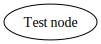

In [1]:
from graphviz import Graph
g = Graph()
g.node('Test node')
g

## Question 2
A company is providing weather data over a REST-based API to several customers. The API is hosted by Amazon API Gateway and is integrated with different AWS Lambda functions for each API operation. The company uses Amazon Route 53 for DNS and has created a resource record of weather.example.com. The company stores data for the API in Amazon DynamoDB tables. The company needs a solution that will give the API the ability to fail over to a different AWS Region.
Which solution will meet these requirements?

1. Deploy a new set of Lambda functions in a new Region. Update the API Gateway API to use an edge-optimized API endpoint with Lambda functions from both Regions as targets. Convert the DynamoDB tables to global tables.
2. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.
3. Deploy a new API Gateway API and Lambda functions in another Region. Change the Route 53 DNS record to a failover record. Enable target health monitoring. Convert the DynamoDB tables to global tables.
4. Deploy a new API Gateway API in a new Region. Change the Lambda functions to global functions. Change the Route 53 DNS record to a multivalue answer. Add both API Gateway APIs to the answer. Enable target health monitoring. Convert the DynamoDB tables to global tables.

#### Unknown terms
- **[Edge-optimized API endpoints](https://docs.aws.amazon.com/apigateway/latest/developerguide/api-gateway-basic-concept.html#apigateway-definition-edge-optimized-api-endpoint)** \
  Using CloudFront distribution to help client access API Gateway API faster
- **[Failover routing](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-failover.html)** \
  route traffic to a healthy resource or to a different resource when the first resource is unhealthy

**Answer: 3**

Reference: [Implementing Multi-Region Disaster Recovery Using Event-Driven Architecture](https://aws.amazon.com/blogs/architecture/implementing-multi-region-disaster-recovery-using-event-driven-architecture/)

Explanation:
- 1: Edge-optimized API endpoints helps route traffic to distributed client

- 2 & 4: Multivalue answer routing provide load balancing and route traffic randomly \
  Reference: [Multivalue answer routing](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-multivalue.html)

- 4: No such global Lambda function only [Lambda@edge](https://docs.aws.amazon.com/lambda/latest/dg/lambda-edge.html)

## Question 3
A company uses AWS Organizations with a single OU named Production to manage multiple accounts. All accounts are members of the Production OU. Administrators use deny list SCPs in the root of the organization to manage access to restricted services.
The company recently acquired a new business unit and invited the new unit’s existing AWS account to the organization. Once onboarded, the administrators of the new business unit discovered that they are not able to update existing AWS Config rules to meet the company’s policies.
Which option will allow administrators to make changes and continue to enforce the current policies without introducing additional long-term maintenance?

1. Remove the organization’s root SCPs that limit access to AWS Config. Create AWS Service Catalog products for the company’s standard AWS Config rules and deploy them throughout the organization, including the new account.
2. Create a temporary OU named Onboarding for the new account. Apply an SCP to the Onboarding OU to allow AWS Config actions. Move the new account to the Production OU when adjustments to AWS Config are completed.
3. Convert the organization’s root SCPs from deny list SCPs to allow list SCPs to allow the required services only. Temporarily apply an SCP to the organization’s root that allows AWS Config actions for principals only in the new account.
4. Create a temporary OU named Onboarding for the new account. Apply an SCP to the Onboarding OU to allow AWS Config actions. Move the organization’s root SCP to the Production OU. Move the new account to the Production OU when adjustments to AWS Config are complete.

#### Unknown terms:
- [Service Catalog](https://docs.aws.amazon.com/servicecatalog/)
- [Understanding management policy inheritance](https://docs.aws.amazon.com/organizations/latest/userguide/orgs_manage_policies_inheritance_mgmt.html)

**Answer: 4**

Explanation:
- 1: AWS Service Catalog does not support AWS Config \
    [AWS Service Catalog's Product](https://docs.aws.amazon.com/servicecatalog/latest/adminguide/what-is_concepts.html#what-is_concepts-product)
- 2: The Onboarding OU inhertis the deny SCPs in the root of the organization
- 3: This option will cause additional long-term maintenance, everytime an account in the new unit want to update required services, we have to repeat this action


## Question 4
A company is running a two-tier web-based application in an on-premises data center. The application layer consists of a single server running a stateful application. The application connects to a PostgreSQL database running on a separate server. The application’s user base is expected to grow significantly, so the company is migrating the application and database to AWS. The solution will use Amazon Aurora PostgreSQL, Amazon EC2 Auto Scaling, and Elastic Load Balancing.

Which solution will provide a consistent user experience that will allow the application and database tiers to scale?

1. Enable Aurora Auto Scaling for Aurora Replicas. Use a Network Load Balancer with the least outstanding requests routing algorithm and sticky sessions enabled.

2. Enable Aurora Auto Scaling for Aurora writers. Use an Application Load Balancer with the round robin routing algorithm and sticky sessions enabled.

3. Enable Aurora Auto Scaling for Aurora Replicas. Use an Application Load Balancer with the round robin routing and sticky sessions enabled.

4. Enable Aurora Scaling for Aurora writers. Use a Network Load Balancer with the least outstanding requests routing algorithm and sticky sessions enabled.

**Answer: 3**

#### Unknown terms:
- [Routing algorithm](https://docs.aws.amazon.com/elasticloadbalancing/latest/application/load-balancer-target-groups.html#modify-routing-algorithm)

Explanation:
- 1: Only ALB has routing algorithm
- 2 & 4: Aurora Auto Scaling for Aurora writers does not exist

## Question 5
A company uses a service to collect metadata from applications that the company hosts on premises. Consumer devices such as TVs and internet radios access the applications. Many older devices do not support certain HTTP headers and exhibit errors when these headers are present in responses. The company has configured an on-premises load balancer to remove the unsupported headers from responses sent to older devices, which the company identified by the User-Agent headers.

The company wants to migrate the service to AWS, adopt serverless technologies, and retain the ability to support the older devices. The company has already migrated the applications into a set of AWS Lambda functions.
Which solution will meet these requirements?

1. Create an Amazon CloudFront distribution for the metadata service. Create an Application Load Balancer (ALB). Configure the CloudFront distribution to forward requests to the ALB. Configure the ALB to invoke the correct Lambda function for each type of request. Create a CloudFront function to remove the problematic headers based on the value of the User-Agent header.

2. Create an Amazon API Gateway REST API for the metadata service. Configure API Gateway to invoke the correct Lambda function for each type of request. Modify the default gateway responses to remove the problematic headers based on the value of the User-Agent header.

3. Create an Amazon API Gateway HTTP API for the metadata service. Configure API Gateway to invoke the correct Lambda function for each type of request. Create a response mapping template to remove the problematic headers based on the value of the User-Agent. Associate the response data mapping with the HTTP API.

4. Create an Amazon CloudFront distribution for the metadata service. Create an Application Load Balancer (ALB). Configure the CloudFront distribution to forward requests to the ALB. Configure the ALB to invoke the correct Lambda function for each type of request. Create a Lambda@Edge function that will remove the problematic headers in response to viewer requests based on the value of the User-Agent header.

**Answer: 1**
> Header manipulation – You can insert, modify, or delete HTTP headers in the request or response. For example, you can add a True-Client-IP header to every request.

[CloudFront Functions](https://docs.aws.amazon.com/AmazonCloudFront/latest/DeveloperGuide/cloudfront-functions.html)

Explanation:
- 2 & 3: require a lot of maintanence
- 4: Lambda@Edge is more suitable for heavy workload. [Reference](https://aws.amazon.com/blogs/aws/introducing-cloudfront-functions-run-your-code-at-the-edge-with-low-latency-at-any-scale/)

In [ ]:
%%bash

# Shared commands
export AWS_ACCESS_KEY_ID=""
export AWS_SECRET_ACCESS_KEY=""
export AWS_DEFAULT_REGION="us-east-1"
APP_NAME="MetadataService"

lambda_role_name="allow-write-log"
role_arn=$(aws iam create-role \
    --role-name "$lambda_role_name" \
    --assume-role-policy-document "{
        \"Version\": \"2012-10-17\",
        \"Statement\": [
            {
                \"Action\": \"sts:AssumeRole\",
                \"Principal\": {
                    \"Service\": \"lambda.amazonaws.com\"
                },
                \"Effect\": \"Allow\",
                \"Sid\": \"\"
            }
        ]
    }" | jq -r ".Role.Arn")
echo "role_arn=$role_arn"

policy=$(aws iam create-policy \
    --policy-name "lambda-write-log" \
    --policy-document "{
        \"Version\": \"2012-10-17\",
        \"Statement\": [
            {
                \"Action\": [
                    \"logs:CreateLogGroup\",
                    \"logs:CreateLogStream\",
                    \"logs:PutLogEvents\"
                ],
                \"Resource\": \"arn:aws:logs:*:*:*\",
                \"Effect\": \"Allow\"
            }
        ]
    }")
policy_arn=$(echo "$policy" | jq -r ".Policy.Arn")
echo "policy_arn=$policy_arn"

aws iam attach-role-policy \
    --role-name "$lambda_role_name" \
    --policy-arn "$policy_arn" >/dev/null

sleep 5
lambda_arn=$(aws lambda create-function \
    --function-name "$APP_NAME" \
    --runtime "python3.11" \
    --handler "index.lambda_handler" \
    --zip-file "fileb://src/q5/lambda.zip" \
    --role "$role_arn" | jq -r ".FunctionArn")
echo "lambda_arn=$lambda_arn"

In [1]:
%%bash

# Option 1 & 4
vpc=$(aws ec2 create-vpc \
    --cidr-block "10.0.0.0/16")
vpc_id=$(echo "$vpc" | jq -r ".Vpc.VpcId")
echo "vpc_id=$vpc_id"

subnet=$(aws ec2 create-subnet \
    --vpc-id "$vpc_id" \
    --cidr-block "10.0.1.0/24" \
    --availability-zone "${AWS_DEFAULT_REGION}a")
subnet_id=$(echo "$subnet" | jq -r ".Subnet.SubnetId")
echo "subnet_id=$subnet_id"

# alb require 2 subnets from 2 azs
subnet1=$(aws ec2 create-subnet \
    --vpc-id "$vpc_id" \
    --cidr-block "10.0.2.0/24" \
    --availability-zone "${AWS_DEFAULT_REGION}b")
subnet1_id=$(echo "$subnet1" | jq -r ".Subnet.SubnetId")
echo "subnet1_id=$subnet1_id"

# Internet Gateway
igw_id=$(aws ec2 create-internet-gateway | jq -r ".InternetGateway.InternetGatewayId")
echo "igw_id=$igw_id"

aws ec2 attach-internet-gateway \
    --internet-gateway-id "$igw_id" \
    --vpc-id "$vpc_id"

# Route Table
rtb=$(aws ec2 create-route-table \
    --vpc-id "$vpc_id")
rtb_id=$(echo "$rtb" | jq -r ".RouteTable.RouteTableId")
echo "rtb_id=$rtb_id"

aws ec2 create-route \
    --route-table-id "$rtb_id" \
    --destination-cidr-block "0.0.0.0/0" \
    --gateway-id "$igw_id" >/dev/null

aws ec2 associate-route-table \
    --route-table-id "$rtb_id" \
    --subnet-id "$subnet_id" >/dev/null
aws ec2 associate-route-table \
    --route-table-id "$rtb_id" \
    --subnet-id "$subnet1_id" >/dev/null

# Application Load Balancer
lambda_sg=$(aws ec2 create-security-group \
    --group-name alb \
    --description "sg for alb" \
    --vpc-id "$vpc_id")
lambda_sg_id=$(echo "$lambda_sg" | jq -r ".GroupId")
echo "lambda_sg_id=$lambda_sg_id"

aws ec2 authorize-security-group-ingress \
    --group-id "$lambda_sg_id" \
    --protocol tcp \
    --port 80 \
    --cidr "0.0.0.0/0" >/dev/null

alb=$(aws elbv2 create-load-balancer \
  --name "$APP_NAME" \
  --subnets "$subnet_id" "$subnet1_id" \
  --security-groups "$lambda_sg_id")
alb_arn=$(echo "$alb" | jq -r ".LoadBalancers[0].LoadBalancerArn")
echo "alb_arn=$alb_arn"
alb_dns=$(echo "$alb" | jq -r ".LoadBalancers[0].DNSName")
echo "alb_dns=$alb_dns"

lambda_target_group_arn=$(aws elbv2 create-target-group \
    --name "lambda-target-group" \
    --target-type "lambda" | jq -r ".TargetGroups[0].TargetGroupArn")
echo "lambda_target_group_arn=$lambda_target_group_arn"

aws lambda add-permission \
    --function-name "$APP_NAME" \
    --statement-id "AllowExecutionFromLB" \
    --action "lambda:InvokeFunction" \
    --principal "elasticloadbalancing.amazonaws.com" \
    --source-arn "$lambda_target_group_arn" >/dev/null

aws elbv2 register-targets \
    --target-group-arn "$lambda_target_group_arn" \
    --targets "Id=$lambda_arn" >/dev/null

aws elbv2 create-listener \
  --load-balancer-arn "$alb_arn" \
  --protocol HTTP \
  --port 80 \
  --default-actions "Type=forward,TargetGroupArn=$lambda_target_group_arn" >/dev/null

# CloudFront
# https://docs.aws.amazon.com/AmazonCloudFront/latest/DeveloperGuide/restrict-access-to-load-balancer.html
CF_FUNC_NAME="remove-headers"
cf_func=$(aws cloudfront create-function \
    --name "$CF_FUNC_NAME" \
    --function-config "{
            \"Comment\":\"Function to remove the problematic headers based on the value of the User-Agent header\",
            \"Runtime\":\"cloudfront-js-1.0\"
        }" \
    --function-code "fileb://src/q5/cf-func.js")

cf_func_etag=$(echo "$cf_func" | jq -r ".ETag")
echo "cf_func_etag=$cf_func_etag"

cf_func_arn=$(echo "$cf_func" | jq -r ".FunctionSummary.FunctionMetadata.FunctionARN")
echo "cf_func_arn=$cf_func_arn"

aws cloudfront publish-function \
    --name "$CF_FUNC_NAME" \
    --if-match "$cf_func_etag" >/dev/null

cfd_domain_name=$(aws cloudfront create-distribution --distribution-config "{
        \"CallerReference\":\"${APP_NAME}\",
        \"DefaultRootObject\":\"\",
        \"Origins\":{
            \"Quantity\":1,
            \"Items\":[{
                \"Id\":\"Metadata-Service\",
                \"DomainName\":\"${alb_dns}\",
                \"CustomOriginConfig\":{
                    \"HTTPPort\":80,
                    \"HTTPSPort\":443,
                    \"OriginProtocolPolicy\":\"http-only\",
                    \"OriginSslProtocols\":{
                        \"Quantity\":1,
                        \"Items\":[\"TLSv1.2\"]
                    }
                },
                \"CustomHeaders\":{
                    \"Quantity\":1,
                    \"Items\":[{
                        \"HeaderName\":\"X-From-Where\",
                        \"HeaderValue\":\"from-cloudfront\"
                    }]
                }
            }]
        },
        \"DefaultCacheBehavior\":{
            \"TargetOriginId\":\"Metadata-Service\",
            \"ViewerProtocolPolicy\":\"redirect-to-https\",
            \"MinTTL\": 0,
            \"MaxTTL\": 0,
            \"DefaultTTL\": 0,
            
            \"ForwardedValues\":{
                \"QueryString\":true,
                \"Cookies\":{
                    \"Forward\":\"all\"
                }
            },
           \"FunctionAssociations\":{
                \"Quantity\":1,
                \"Items\":[{
                    \"FunctionARN\": \"${cf_func_arn}\",
                    \"EventType\": \"viewer-response\"
                }]
           }
        },
        \"Comment\":\"${APP_NAME}\",
        \"Enabled\":true
    }" | jq -r ".Distribution.DomainName")
echo "$cfd_domain_name"


An error occurred (AccessDenied) when calling the RegisterTargets operation: elasticloadbalancing principal does not have permission to invoke arn:aws:lambda:us-west-2:721318668125:function:MetadataService from target group arn:aws:elasticloadbalancing:us-west-2:721318668125:targetgroup/lambda-target-group/e9854e7a1b340986


In [ ]:
%%bash

# Option 2 & 3
# Create or update the API
apigw=$(aws apigatewayv2 create-api \
    --name "$APP_NAME" \
    --protocol-type HTTP)
apigw_id=$(echo "$apigw" | jq -r ".ApiId")
echo "apigw_id=$apigw_id"
apigw_endpoint=$(echo "$apigw" | jq -r ".ApiEndpoint")
echo "apigw_endpoint=$apigw_endpoint"

integration_id=$(aws apigatewayv2 create-integration \
    --api-id "$apigw_id" \
    --integration-type AWS_PROXY \
    --integration-method GET \
    --integration-uri "$lambda_arn" \
    --payload-format-version 2.0 \
    --response-parameters "{
        \"200\": {
            \"remove:header.Content-Type\": \"''\"
        }
    }" | jq -r ".IntegrationId")

default_route_id=$(aws apigatewayv2 create-route \
    --api-id "$apigw_id" \
    --route-key "\$default" \
    --target "integrations/$integration_id")
echo "default_route_id=$default_route_id"

# Deploy the API to apply the changes
STAGE_NAME="deploy-lambda"
aws apigatewayv2 create-stage \
    --api-id "$apigw_id" \
    --stage-name "$STAGE_NAME" \
    --stage-variables "deployment=${STAGE_NAME}" > /dev/null

api_deployment_id=$(aws apigatewayv2 create-deployment \
    --api-id "$apigw_id" \
    --stage-name "$STAGE_NAME" | jq -r ".DeploymentId")
echo "api_deployment_id=$api_deployment_id"

account_id=$(aws sts get-caller-identity | jq -r ".Account")
echo "account_id=$account_id"

aws lambda add-permission \
  --function-name "$lambda_arn" \
  --statement-id "AllowExecutionFromAPIGW" \
  --action "lambda:InvokeFunction" \
  --principal "apigateway.amazonaws.com" \
  --source-arn "arn:aws:execute-api:${AWS_DEFAULT_REGION}:${account_id}:${apigw_id}/*" > /dev/null


## Question 6
A retail company needs to provide a series of data files to another company, which is its business partner. These files are saved in an Amazon S3 bucket under Account A, which belongs to the retail company. The business partner company wants one of its IAM users, User_DataProcessor, to access the files from its own AWS account (Account B).

Which combination of steps must the companies take so that User_DataProcessor can access the S3 bucket successfully? (Choose two.)

1. Turn on the cross-origin resource sharing (CORS) feature for the S3 bucket in Account A.

2. In Account A, set the S3 bucket policy to the following: \
```json
{
    "Effect": "Allow",
    "Action": [
        "s3:GetObject",
        "s3:ListBucket"
    ],
    "Resource": "arn:aws:s3:::AccountABucketName/*"
}
```
3. In Account A, set the S3 bucket policy to the following: \
```json
{
    "Effect": "Allow",
    "Principal": {
        "AWS": "arn:aws:iam:: AccountB:user/User_DataProcessor"
    },
    "Action": [
        "s3:GetObject",
        "s3:ListBucket"
    ],
    "Resource": [
        "arn:aws:s3::: AccountABucketName/*"
    ]
}
```

4. In Account B, set the permissions of User_DataProcessor to the following: \
```json
{
    "Effect": "Allow",
    "Action": [
        "s3:GetObject",
        "s3:ListBucket"
    ],
    "Resource": "arn:aws:s3:::AccountABucketName/*"
}
```

5. In Account B, set the permissions of User_DataProcessor to the following: \
```json
{
    "Effect": "Allow",
    "Principal": {
        "AWS": "arn:aws:iam:: AccountB:user/User_DataProcessor"
    },
    "Action": [
        "s3:GetObject",
        "s3:ListBucket"
    ],
    "Resource": [
        "arn:aws:s3::: AccountABucketName/*"
    ]
}
```

**Answer: 3 & 5**

Explanation: It's apply the least priviledge principle 

## Question 7
A company is running a traditional web application on Amazon EC2 instances. The company needs to refactor the application as microservices that run on containers. Separate versions of the application exist in two distinct environments: production and testing. Load for the application is variable, but the minimum load and the maximum load are known. A solutions architect needs to design the updated application with a serverless architecture that minimizes operational complexity.

Which solution will meet these requirements MOST cost-effectively?

1. Upload the container images to AWS Lambda as functions. Configure a concurrency limit for the associated Lambda functions to handle the expected peak load. Configure two separate Lambda integrations within Amazon API Gateway: one for production and one for testing.

2. Upload the container images to Amazon Elastic Container Registry (Amazon ECR). Configure two auto scaled Amazon Elastic Container Service (Amazon ECS) clusters with the Fargate launch type to handle the expected load. Deploy tasks from the ECR images. Configure two separate Application Load Balancers to direct traffic to the ECS clusters.

3. Upload the container images to Amazon Elastic Container Registry (Amazon ECR). Configure two auto scaled Amazon Elastic Kubernetes Service (Amazon EKS) clusters with the Fargate launch type to handle the expected load. Deploy tasks from the ECR images. Configure two separate Application Load Balancers to direct traffic to the EKS clusters.

4. Upload the container images to AWS Elastic Beanstalk. In Elastic Beanstalk, create separate environments and deployments for production and testing. Configure two separate Application Load Balancers to direct traffic to the Elastic Beanstalk deployments.

**Answer: 2**

Explanation:
- 1 & 4: Lambda and Elastic Beanstalk are not a place to store container image
- 3: EKS cost more than ECS

## Question 8
A company has a multi-tier web application that runs on a fleet of Amazon EC2 instances behind an Application Load Balancer (ALB). The instances are in an Auto Scaling group. The ALB and the Auto Scaling group are replicated in a backup AWS Region. The minimum value and the maximum value for the Auto Scaling group are set to zero. An Amazon RDS Multi-AZ DB instance stores the application’s data. The DB instance has a read replica in the backup Region. The application presents an endpoint to end users by using an Amazon Route 53 record.

The company needs to reduce its RTO to less than 15 minutes by giving the application the ability to automatically fail over to the backup Region. The company does not have a large enough budget for an active-active strategy.
What should a solutions architect recommend to meet these requirements?

1. Reconfigure the application’s Route 53 record with a latency-based routing policy that load balances traffic between the two ALBs. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Create an Amazon CloudWatch alarm that is based on the HTTPCode_Target_5XX_Count metric for the ALB in the primary Region. Configure the CloudWatch alarm to invoke the Lambda function.

2. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Configure Route 53 with a health check that monitors the web application and sends an Amazon Simple Notification Service (Amazon SNS) notification to the Lambda function when the health check status is unhealthy. Update the application’s Route 53 record with a failover policy that routes traffic to the ALB in the backup Region when a health check failure occurs.

3. Configure the Auto Scaling group in the backup Region to have the same values as the Auto Scaling group in the primary Region. Reconfigure the application’s Route 53 record with a latency-based routing policy that load balances traffic between the two ALBs. Remove the read replica. Replace the read replica with a standalone RDS DB instance. Configure Cross-Region Replication between the RDS DB instances by using snapshots and Amazon S3.

4. Configure an endpoint in AWS Global Accelerator with the two ALBs as equal weighted targets. Create an AWS Lambda function in the backup Region to promote the read replica and modify the Auto Scaling group values. Create an Amazon CloudWatch alarm that is based on the HTTPCode_Target_5XX_Count metric for the ALB in the primary Region. Configure the CloudWatch alarm to invoke the Lambda function.

**Answer: 2**

use [active-passive](https://docs.aws.amazon.com/whitepapers/latest/disaster-recovery-workloads-on-aws/disaster-recovery-options-in-the-cloud.html) recovery strategies for lower budget

Explanation:
- 1 & 3: The [latency-based routing policy](https://docs.aws.amazon.com/Route53/latest/DeveloperGuide/routing-policy-latency.html) is for improving performance

> If your application is hosted in multiple AWS Regions, you can improve performance for your users by serving their requests from the AWS Region that provides the lowest latency. 

- 4: AWS Global Accelerator is suit for load balancing but not for active-passive strategies

## Question 9
A company is hosting a critical application on a single Amazon EC2 instance. The application uses an Amazon ElastiCache for Redis single-node cluster for an in-memory data store. The application uses an Amazon RDS for MariaDB DB instance for a relational database. For the application to function, each piece of the infrastructure must be healthy and must be in an active state.

A solutions architect needs to improve the application's architecture so that the infrastructure can automatically recover from failure with the least possible downtime.

Which combination of steps will meet these requirements? (Choose three.)

1. Use an Elastic Load Balancer to distribute traffic across multiple EC2 instances. Ensure that the EC2 instances are part of an Auto Scaling group that has a minimum capacity of two instances.

2. Use an Elastic Load Balancer to distribute traffic across multiple EC2 instances. Ensure that the EC2 instances are configured in unlimited mode.

3. Modify the DB instance to create a read replica in the same Availability Zone. Promote the read replica to be the primary DB instance in failure scenarios.

4. Modify the DB instance to create a Multi-AZ deployment that extends across two Availability Zones.

5. Create a replication group for the ElastiCache for Redis cluster. Configure the cluster to use an Auto Scaling group that has a minimum capacity of two instances.

6. Create a replication group for the ElastiCache for Redis cluster. Enable Multi-AZ on the cluster.

**Answer: 1, 4, 6**

Explanation:
- 2: [EC2 instances's unlimited mode](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/burstable-performance-instances-unlimited-mode.html) is used for increasing performance
- 3 & 5: only [RDS Multi-AZ deployment](https://docs.aws.amazon.com/AmazonRDS/latest/UserGuide/Concepts.MultiAZ.html) and [ElastiCache with Multi-AZ](https://docs.aws.amazon.com/AmazonElastiCache/latest/red-ug/AutoFailover.html) support failover

## Question 10
A retail company is operating its ecommerce application on AWS. The application runs on Amazon EC2 instances behind an Application Load Balancer (ALB). The company uses an Amazon RDS DB instance as the database backend. Amazon CloudFront is configured with one origin that points to the ALB. Static content is cached. Amazon Route 53 is used to host all public zones.
After an update of the application, the ALB occasionally returns a 502 status code (Bad Gateway) error. The root cause is malformed HTTP headers that are returned to the ALB. The webpage returns successfully when a solutions architect reloads the webpage immediately after the error occurs.

While the company is working on the problem, the solutions architect needs to provide a custom error page instead of the standard ALB error page to visitors.

Which combination of steps will meet this requirement with the LEAST amount of operational overhead? (Choose two.)

1. Create an Amazon S3 bucket. Configure the S3 bucket to host a static webpage. Upload the custom error pages to Amazon S3.
2. Create an Amazon CloudWatch alarm to invoke an AWS Lambda function if the ALB health check response Target.FailedHealthChecks is greater than 0. Configure the Lambda function to modify the forwarding rule at the ALB to point to a publicly accessible web server.
3. Modify the existing Amazon Route 53 records by adding health checks. Configure a fallback target if the health check fails. Modify DNS records to point to a publicly accessible webpage.
4. Create an Amazon CloudWatch alarm to invoke an AWS Lambda function if the ALB health check response Elb.InternalError is greater than 0. Configure the Lambda function to modify the forwarding rule at the ALB to point to a public accessible web server.
5. Add a custom error response by configuring a CloudFront custom error page. Modify DNS records to point to a publicly accessible web page.

**Answer: 1, 5**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 11
A company has many AWS accounts and uses AWS Organizations to manage all of them. A solutions architect must implement a solution that the company can use to share a common network across multiple accounts.
The company’s infrastructure team has a dedicated infrastructure account that has a VPC. The infrastructure team must use this account to manage the network. Individual accounts cannot have the ability to manage their own networks. However, individual accounts must be able to create AWS resources within subnets.
Which combination of actions should the solutions architect perform to meet these requirements? (Choose two.)

1. Create a transit gateway in the infrastructure account.
2. Enable resource sharing from the AWS Organizations management account.
3. Create VPCs in each AWS account within the organization in AWS Organizations. Configure the VPCs to share the same CIDR range and subnets as the VPC in the infrastructure account. Peer the VPCs in each individual account with the VPC in the infrastructure account.
4. Create a resource share in AWS Resource Access Manager in the infrastructure account. Select the specific AWS Organizations OU that will use the shared network. Select each subnet to associate with the resource share.
5. Create a resource share in AWS Resource Access Manager in the infrastructure account. Select the specific AWS Organizations OU that will use the shared network. Select each prefix list to associate with the resource share.

#### Unknown terms:
- **[Prefix list](https://docs.aws.amazon.com/vpc/latest/userguide/sharing-managed-prefix-lists.html)**

**Answer: 2, 4**

Explanation:
- 1: Transit Gateway only help connect VPCs and on-prem network
- 2: 
> To share a prefix list with your organization or an organizational unit in AWS Organizations, you must enable sharing with AWS Organizations
- 3: can not peer the VPCs with the same CIDR
- 5: it will require more operational overhead than option 4

## Question 12
A company wants to use a third-party software-as-a-service (SaaS) application. The third-party SaaS application is consumed through several API calls. The third-party SaaS application also runs on AWS inside a VPC.
The company will consume the third-party SaaS application from inside a VPC. The company has internal security policies that mandate the use of private connectivity that does not traverse the internet. No resources that run in the company VPC are allowed to be accessed from outside the company’s VPC. All permissions must conform to the principles of least privilege.
Which solution meets these requirements?

1. Create an AWS PrivateLink interface VPC endpoint. Connect this endpoint to the endpoint service that the third-party SaaS application provides. Create a security group to limit the access to the endpoint. Associate the security group with the endpoint.
2. Create an AWS Site-to-Site VPN connection between the third-party SaaS application and the company VPC. Configure network ACLs to limit access across the VPN tunnels.
3. Create a VPC peering connection between the third-party SaaS application and the company VPC. Update route tables by adding the needed routes for the peering connection.
4. Create an AWS PrivateLink endpoint service. Ask the third-party SaaS provider to create an interface VPC endpoint for this endpoint service. Grant permissions for the endpoint service to the specific account of the third-party SaaS provider.

**Answer: 1**

Explanation:
- 2: [AWS Site-to-Site VPN](https://docs.aws.amazon.com/vpn/latest/s2svpn/VPC_VPN.html) is used to connect your VPC and on-prem network
- 3: AWS PrivateLink is more suitable for conforming to the principles of least privilege than VPC peering in this client/server model
>AWS PrivateLink — Use AWS PrivateLink when you have a client/server set up where you want to allow one or more consumer VPCs unidirectional access to a specific service or set of instances in the service provider VPC. Only the clients in the consumer VPC can initiate a connection to the service in the service provider VPC. This is also a good option when client and servers in the two VPCs have overlapping IP addresses as AWS PrivateLink uses ENIs within the client VPC in a manner that ensures that are no IP conflicts with the service provider. You can access AWS PrivateLink endpoints over VPC Peering, VPN, and AWS Direct Connect. [Reference](https://docs.aws.amazon.com/whitepapers/latest/building-scalable-secure-multi-vpc-network-infrastructure/aws-privatelink.html)
- 4: Saas provider should be the one who create endpoint service and allow connect from our interface VPC endpoint

## Question 13
A company needs to implement a patching process for its servers. The on-premises servers and Amazon EC2 instances use a variety of tools to perform patching. Management requires a single report showing the patch status of all the servers and instances.
Which set of actions should a solutions architect take to meet these requirements?

1. Use AWS Systems Manager to manage patches on the on-premises servers and EC2 instances. Use Systems Manager to generate patch compliance reports.
2. Use AWS OpsWorks to manage patches on the on-premises servers and EC2 instances. Use Amazon QuickSight integration with OpsWorks to generate patch compliance reports.
3. Use an Amazon EventBridge rule to apply patches by scheduling an AWS Systems Manager patch remediation job. Use Amazon Inspector to generate patch compliance reports.
4. Use AWS OpsWorks to manage patches on the on-premises servers and EC2 instances. Use AWS X-Ray to post the patch status to AWS Systems Manager OpsCenter to generate patch compliance reports.

**Answer: 1**

Explanation:
- 2: [Amazon QuickSight](https://docs.aws.amazon.com/quicksight/latest/user/welcome.html) is a BI service helps deliver insights and create dashboard from its
- 3: [Amazon Inspector](https://docs.aws.amazon.com/managedservices/latest/userguide/inspector.html) is used for security assessment
- 4: [AWS X-Ray](https://docs.aws.amazon.com/xray/latest/devguide/aws-xray.html) collect data from request to identify issues for distributed systems

## Question 14
A company is running an application on several Amazon EC2 instances in an Auto Scaling group behind an Application Load Balancer. The load on the application varies throughout the day, and EC2 instances are scaled in and out on a regular basis. Log files from the EC2 instances are copied to a central Amazon S3 bucket every 15 minutes. The security team discovers that log files are missing from some of the terminated EC2 instances.
Which set of actions will ensure that log files are copied to the central S3 bucket from the terminated EC2 instances?

1. Create a script to copy log files to Amazon S3, and store the script in a file on the EC2 instance. Create an Auto Scaling lifecycle hook and an Amazon EventBridge rule to detect lifecycle events from the Auto Scaling group. Invoke an AWS Lambda function on the autoscaling:EC2_INSTANCE_TERMINATING transition to send ABANDON to the Auto Scaling group to prevent termination, run the script to copy the log files, and terminate the instance using the AWS SDK.
2. Create an AWS Systems Manager document with a script to copy log files to Amazon S3. Create an Auto Scaling lifecycle hook and an Amazon EventBridge rule to detect lifecycle events from the Auto Scaling group. Invoke an AWS Lambda function on the autoscaling:EC2_INSTANCE_TERMINATING transition to call the AWS Systems Manager API SendCommand operation to run the document to copy the log files and send CONTINUE to the Auto Scaling group to terminate the instance.
3. Change the log delivery rate to every 5 minutes. Create a script to copy log files to Amazon S3, and add the script to EC2 instance user data. Create an Amazon EventBridge rule to detect EC2 instance termination. Invoke an AWS Lambda function from the EventBridge rule that uses the AWS CLI to run the user-data script to copy the log files and terminate the instance.
4. Create an AWS Systems Manager document with a script to copy log files to Amazon S3. Create an Auto Scaling lifecycle hook that publishes a message to an Amazon Simple Notification Service (Amazon SNS) topic. From the SNS notification, call the AWS Systems Manager API SendCommand operation to run the document to copy the log files and send ABANDON to the Auto Scaling group to terminate the instance.

**Answer: 2**

Explanation:
- 1: This option requires more manual steps, send ABANDON to ASG and terminate the instance using SDK
- 3: EC2 user data is suitable for running script (to install package & config server) when launching instances. [Reference](https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/user-data.html)
- 4: SNS can not directly call API SendCommand from Systems Manager

## Question 15
A company is using multiple AWS accounts. The DNS records are stored in a private hosted zone for Amazon Route 53 in Account A. The company’s applications and databases are running in Account B.
A solutions architect will deploy a two-tier application in a new VPC. To simplify the configuration, the db.example.com CNAME record set for the Amazon RDS endpoint was created in a private hosted zone for Amazon Route 53.
During deployment, the application failed to start. Troubleshooting revealed that db.example.com is not resolvable on the Amazon EC2 instance. The solutions architect confirmed that the record set was created correctly in Route 53.
Which combination of steps should the solutions architect take to resolve this issue? (Choose two.)

1. Deploy the database on a separate EC2 instance in the new VPC. Create a record set for the instance’s private IP in the private hosted zone.
2. Use SSH to connect to the application tier EC2 instance. Add an RDS endpoint IP address to the /etc/resolv.conf file.
3. Create an authorization to associate the private hosted zone in Account A with the new VPC in Account B.
4. Create a private hosted zone for the example com domain in Account B. Configure Route 53 replication between AWS accounts.
5. Associate a new VPC in Account B with a hosted zone in Account A. Delete the association authorization in Account A.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 16
A company used Amazon EC2 instances to deploy a web fleet to host a blog site. The EC2 instances are behind an Application Load Balancer (ALB) and are configured in an Auto Scaling group. The web application stores all blog content on an Amazon EFS volume.
The company recently added a feature for bloggers to add video to their posts, attracting 10 times the previous user traffic. At peak times of day, users report buffering and timeout issues while attempting to reach the site or watch videos.
Which is the MOST cost-efficient and scalable deployment that will resolve the issues for users?

1. Reconfigure Amazon EFS to enable maximum I/O.
2. Update the blog site to use instance store volumes for storage. Copy the site contents to the volumes at launch and to Amazon S3 at shutdown.
3. Configure an Amazon CloudFront distribution. Point the distribution to an S3 bucket, and migrate the videos from EFS to Amazon S3.
4. Set up an Amazon CloudFront distribution for all site contents, and point the distribution at the ALB.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 17
A company with global offices has a single 1 Gbps AWS Direct Connect connection to a single AWS Region. The company’s on-premises network uses the connection to communicate with the company’s resources in the AWS Cloud. The connection has a single private virtual interface that connects to a single VPC.
A solutions architect must implement a solution that adds a redundant Direct Connect connection in the same Region. The solution also must provide connectivity to other Regions through the same pair of Direct Connect connections as the company expands into other Regions.
Which solution meets these requirements?

1. Provision a Direct Connect gateway. Delete the existing private virtual interface from the existing connection. Create the second Direct Connect connection. Create a new private virtual interface on each connection, and connect both private virtual interfaces to the Direct Connect gateway. Connect the Direct Connect gateway to the single VPC.
2. Keep the existing private virtual interface. Create the second Direct Connect connection. Create a new private virtual interface on the new connection, and connect the new private virtual interface to the single VPC.
3. Keep the existing private virtual interface. Create the second Direct Connect connection. Create a new public virtual interface on the new connection, and connect the new public virtual interface to the single VPC.
4. Provision a transit gateway. Delete the existing private virtual interface from the existing connection. Create the second Direct Connect connection. Create a new private virtual interface on each connection, and connect both private virtual interfaces to the transit gateway. Associate the transit gateway with the single VPC.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 18
A company has a web application that allows users to upload short videos. The videos are stored on Amazon EBS volumes and analyzed by custom recognition software for categorization.
The website contains static content that has variable traffic with peaks in certain months. The architecture consists of Amazon EC2 instances running in an Auto Scaling group for the web application and EC2 instances running in an Auto Scaling group to process an Amazon SQS queue. The company wants to re-architect the application to reduce operational overhead using AWS managed services where possible and remove dependencies on third-party software.
Which solution meets these requirements?

1. Use Amazon ECS containers for the web application and Spot instances for the Auto Scaling group that processes the SQS queue. Replace the custom software with Amazon Rekognition to categorize the videos.
2. Store the uploaded videos in Amazon EFS and mount the file system to the EC2 instances for the web application. Process the SQS queue with an AWS Lambda function that calls the Amazon Rekognition API to categorize the videos.
3. Host the web application in Amazon S3. Store the uploaded videos in Amazon S3. Use S3 event notification to publish events to the SQS queue. Process the SQS queue with an AWS Lambda function that calls the Amazon Rekognition API to categorize the videos.
4. Use AWS Elastic Beanstalk to launch EC2 instances in an Auto Scaling group for the web application and launch a worker environment to process the SQS queue. Replace the custom software with Amazon Rekognition to categorize the videos.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 19
A company has a serverless application comprised of Amazon CloudFront, Amazon API Gateway, and AWS Lambda functions. The current deployment process of the application code is to create a new version number of the Lambda function and run an AWS CLI script to update. If the new function version has errors, another CLI script reverts by deploying the previous working version of the function. The company would like to decrease the time to deploy new versions of the application logic provided by the Lambda functions, and also reduce the time to detect and revert when errors are identified.
How can this be accomplished?

1. Create and deploy nested AWS CloudFormation stacks with the parent stack consisting of the AWS CloudFront distribution and API Gateway, and the child stack containing the Lambda function. For changes to Lambda, create an AWS CloudFormation change set and deploy; if errors are triggered, revert the AWS CloudFormation change set to the previous version.
2. Use AWS SAM and built-in AWS CodeDeploy to deploy the new Lambda version, gradually shift traffic to the new version, and use pre-traffic and post-traffic test functions to verify code. Rollback if Amazon CloudWatch alarms are triggered.
3. Refactor the AWS CLI scripts into a single script that deploys the new Lambda version. When deployment is completed, the script tests execute. If errors are detected, revert to the previous Lambda version.
4. Create and deploy an AWS CloudFormation stack that consists of a new API Gateway endpoint that references the new Lambda version. Change the CloudFront origin to the new API Gateway endpoint, monitor errors and if detected, change the AWS CloudFront origin to the previous API Gateway endpoint.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown

## Question 20
A company is planning to store a large number of archived documents and make the documents available to employees through the corporate intranet. Employees will access the system by connecting through a client VPN service that is attached to a VPC. The data must not be accessible to the public.
The documents that the company is storing are copies of data that is held on physical media elsewhere. The number of requests will be low. Availability and speed of retrieval are not concerns of the company.
Which solution will meet these requirements at the LOWEST cost?

1. Create an Amazon S3 bucket. Configure the S3 bucket to use the S3 One Zone-Infrequent Access (S3 One Zone-IA) storage class as default. Configure the S3 bucket for website hosting. Create an S3 interface endpoint. Configure the S3 bucket to allow access only through that endpoint.
2. Launch an Amazon EC2 instance that runs a web server. Attach an Amazon Elastic File System (Amazon EFS) file system to store the archived data in the EFS One Zone-Infrequent Access (EFS One Zone-IA) storage class Configure the instance security groups to allow access only from private networks.
3. Launch an Amazon EC2 instance that runs a web server Attach an Amazon Elastic Block Store (Amazon EBS) volume to store the archived data. Use the Cold HDD (sc1) volume type. Configure the instance security groups to allow access only from private networks.
4. Create an Amazon S3 bucket. Configure the S3 bucket to use the S3 Glacier Deep Archive storage class as default. Configure the S3 bucket for website hosting. Create an S3 interface endpoint. Configure the S3 bucket to allow access only through that endpoint.

**Answer: 2, 3**

Explanation:
- 2 & 4: using Lambda to modify ALB require more operational overhead and add complexity
- 3: if a client request come before health check, error page won't be shown